# Naive Bayes from Scratch

In [21]:
import numpy as np

In [4]:
from sklearn.datasets import make_blobs

## Preparation of Fake data

In [9]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=101)
print(X[:5])
print(y[:5])

[[-9.46494711 -5.88115845]
 [ 0.29681207  3.35328405]
 [ 2.482819    0.80309288]
 [ 0.29639341  2.06317757]
 [-1.13954147  0.91925638]]
[1 0 0 0 0]


## Visualization of generated data

In [10]:
import matplotlib.pyplot as plt

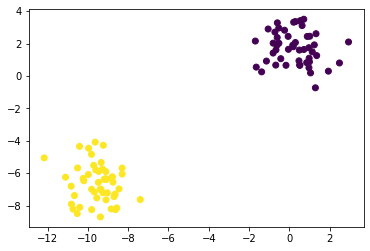

In [15]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)

## Bayes Theorem

**P(A|B) = P(B|A) * P(A) / P(B)**
    
where:
* P(A|B) - Posterior Probability
* P(B|A) - Likelihood
* P(A)   - Prior Probability
* P(B)   - Evidence

We can frame classification as a conditional classification problem with Bayes Theorem as follows:

**P(yi | x1, x2, ..., xn) = P(x1, x2, ..., xn | yi) * P(yi) / P(x1, x2, ..., xn)**  
for each class y (in our case 2 classes)

This becomes difficult to implement with incresing classes and feature number.

***

## Simplified or Naive Bayes

The Bayes Theorem assumes that each input variable is dependent upon all other variables. This is a cause of complexity in the calculation. We can remove this assumption and consider each input variable as being independent from each other.

We also remove the denominator from the calculation P(x1, x2, …, xn) as it is a constant used in calculating the conditional probability of each class for a given instance and has the effect of normalizing the result.

So **P(yi | x1, x2, ..., xn) = P(x1, x2, ..., xn | yi) * P(yi)**  

Next, the conditional probability of **all variables given the class label** i.e. **P(x1, x2, ..., xn | yi)** is changed into separate conditional probabilities of **each variable given the class label**. These independent conditional variables are then multiplied together.  

So **P(yi | x1, x2, ..., xn) = P(x1|yi) * P(x2|yi) * ... P(xn|yi) * P(yi)**

This calculation can be performed for each of the class labels, and the label with the largest probability can be selected as the classification for the given instance. This decision rule is referred to as the **maximum a posteriori**, or **MAP**, decision rule.


***

## Calculation of Prior and Conditional Probabilities

For Priori, **P(yi) = examples with yi / total examples**

The conditional probability for a **feature value given the class label** i.e. **P(xi|yj)** can also be estimated from the data. If there are K classes and n variables, then k * n different probability distributions must be created and maintained. In **our case** k = 2 and n = 2, so there will be **4** different distributions.

Also depending on the data type of features (x1, x2 ...), different approach is used to calculate Conditional probabilities. Common methods are:

* **Binomial distribution*** for Binary type data
* **Multinomial distribution** for Categorucal type data
* **Gaussian distribution** for Numeric data (Our case)

Although using only these three are not mandatory.  
***

In [24]:
# fit a Gaussian probability distribution to a univariate data sample

# Gaussian Distribution is also known as Normal Distribution which is the "norm" below
from scipy.stats import norm

def fit_distribution(data):
    # estimate parameters
    mu = np.mean(data)
    sigma = np.std(data)
    print("Mean =", mu, "Sigma =", sigma)
    # fit distribution
    dist = norm(mu, sigma)
    return dist

In [17]:
# Sorting data into classes

Xy0 = X[y==0]
Xy1 = X[y==1]

print(Xy0.shape, Xy1.shape)

(50, 2) (50, 2)


In [19]:
# Calculating Priori Probabilities
prior0 = len(Xy0)/len(X)
prior1 = len(Xy1)/len(X)

print(prior0, prior1)

0.5 0.5


In [26]:
# Creating Probability Distribution for y==0 which can provide Probability Density Function
X1y0 = fit_distribution(Xy0[:,0])
X2y0 = fit_distribution(Xy0[:,1])

# Creating Probability Distribution for y==1 which can provide Probability Density Function
X1y1 = fit_distribution(Xy1[:,0])
X2y1 = fit_distribution(Xy1[:,1])

Mean = 0.2663005730635291 Sigma = 0.98297639591927
Mean = 1.7508852261061898 Sigma = 1.0154040940538716
Mean = -9.517120068027232 Sigma = 0.8592402816570743
Mean = -6.616782981587322 Sigma = 1.1553296290060329


In [29]:
# predict the class by seeing the value of X

def probability(x):
    # P(y0|x1, x2) = P(x1|y0) * P(x2|y0) * P(y0)
    proba0 = X1y0.pdf(x[0]) * X2y0.pdf(x[1]) * prior0
    
    # P(y1|x1, x2) = P(x1|y1) * P(x2|y1) * P(y1)
    proba1 = X1y1.pdf(x[0]) * X2y1.pdf(x[1]) * prior1
    if proba0 > proba1:
        return 0
    else:
        return 1

In [30]:
# Test for some values
# Although it is not correct since we fitted our model in whole dataset.

l = [0, 10, 15, 16, 58, 69, 80, 99]

for i in l:
    prediction = probability(X[i])
    print("Actual =", y[i], "Predicted =", prediction)


Actual = 1 Predicted = 1
Actual = 0 Predicted = 0
Actual = 0 Predicted = 0
Actual = 0 Predicted = 0
Actual = 0 Predicted = 0
Actual = 1 Predicted = 1
Actual = 0 Predicted = 0
Actual = 0 Predicted = 0


In [32]:
predictions = [probability(X[i]) for i in range(0, len(X))]

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confussion Matrix:\n")
print(confusion_matrix(y, predictions))
print("\nClassification Report:\n")
print(classification_report(y, predictions))

Confussion Matrix:

[[50  0]
 [ 0 50]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

